<a href="https://colab.research.google.com/github/SrDragon8/AdministradorRendimiento/blob/main/EntregaProyectoAnalisisDeNegocios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define the path to the files
# DIR = '/content/drive/MyDrive/Colab Notebooks/ExamenTercerParcial/'
path = '/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/*.csv'
files = glob.glob(path)
print(files)

['/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/EntoAug2.csv']


In [ ]:
i1mport pandas as pd
import glob
import chardet

# Define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/*.csv'

# Read all the files
files = glob.glob(path)

if not files:
    print("No files found")
else:
    dataframes = []
    for file in files:
        try:
            with open(file, 'rb') as f:
                result = chardet.detect(f.read())
                encoding = result['encoding']
                # Check if encoding was detected, if not, use a default
                if encoding is None:
                    encoding = 'latin-1' # Or any other encoding you suspect might be used

            # Try reading the file with different delimiters (comma and semicolon)
            try:
                df = pd.read_csv(file, encoding=encoding)
            except pd.errors.ParserError:
                df = pd.read_csv(file, encoding=encoding, delimiter=',')

            # Standardize column names (replace spaces with underscores and lowercase)
            df.columns = [col.replace(' ', '_').lower() for col in df.columns]

            dataframes.append(df)
        except pd.errors.ParserError as e:
          print(f"Error parsing file: {file}. Skipping...\n")
    try:
        print(f"Columns in the problematic DataFrame from file: {file}: {df.columns}")
    except:
        print(f"Could not access columns of the DataFrame from file: {file}")


    if dataframes:
        df = pd.concat(dataframes, ignore_index=True)
        # Now you can perform your analyses on the concatenated dataframe

        # Check if 'truck_id', 'gas_consumption', and 'distance_traveled' columns exist
        if not all(col in df.columns for col in ['ID Camioneta', 'Costo gasolina', 'Distancia recorrida (km)']):
          print(f"Error: Missing columns in the dataframe. Available columns: {df.columns}")
        else:
          avg_fuel_consumption = df.groupby('ID Camioneta')['Costo gasolina'] / df.groupby('ID Camioneta')['Distancia recorrida (km)']
          avg_fuel_consumption.plot(kind='bar')

Columns in the problematic DataFrame from file: /content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/01_Enero_2024.csv: Index(['fecha_de_entrega', 'id_camioneta', 'municipio_de_destino',
       'distancia_recorrida_(km)', 'litros_consumidos',
       'velocidad_promedio_(km/h)', 'peso_de_carga_(kg)',
       'precio_gasolina_(mxn/litro)', 'costo_gasolina_(mxn)',
       'costo_conductor_(mxn)', 'costo_mantenimiento_(mxn)',
       'costo_total_(mxn)', 'unidades_transportadas', 'ingreso_por_ruta_(mxn)',
       'utilidad_generada_(mxn)', 'mes_de_entrega'],
      dtype='object')
Error: Missing columns in the dataframe. Available columns: Index(['fecha_de_entrega', 'id_camioneta', 'municipio_de_destino',
       'distancia_recorrida_(km)', 'litros_consumidos',
       'velocidad_promedio_(km/h)', 'peso_de_carga_(kg)',
       'precio_gasolina_(mxn/litro)', 'costo_gasolina_(mxn)',
       'costo_conductor_(mxn)', 'costo_mantenimiento_(mxn)',
       'costo_total_(mxn)', 'unidades_transporta


* 'fecha_de_entrega',
* 'id_camioneta',
* 'municipio_de_destino',
* 'distancia_recorrida_(km)',
* 'litros_consumidos',
*  'velocidad_promedio_(km/h)',
*   'peso_de_carga_(kg)',
*   'precio_gasolina_(mxn/litro)',
*   'costo_gasolina_(mxn)',
*   'costo_conductor_(mxn)',
*   'costo_mantenimiento_(mxn)',
*   'costo_total_(mxn)',
*   'unidades_transportadas',
*   'ingreso_por_ruta_(mxn)',
*   'utilidad_generada_(mxn)',
*   'mes_de_entrega',

      dtype='object'

Available columns:
Index(['id_camioneta', 'costo_gasolina_(mxn)', 'distancia_recorrida_(km)',
       'mes_de_entrega', 'litros_consumidos'],
      dtype='object')


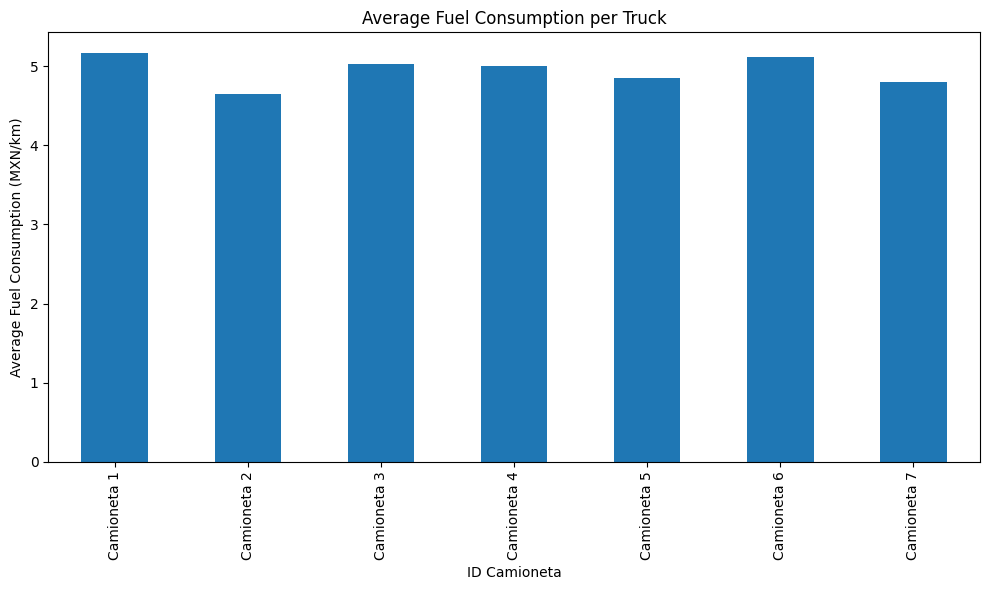

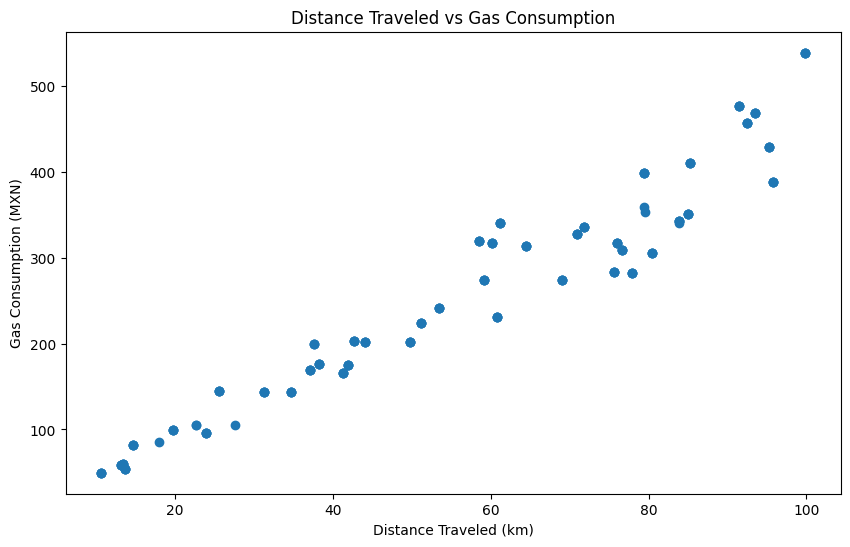



Total Distance Traveled: 10306.68 km
Total Gas Consumption: 46756.941399999996 MXN


Average Distance Traveled per Truck: 52.82621552031012 km
Average Gas Consumption per Truck: 239.52157680733671 MXN






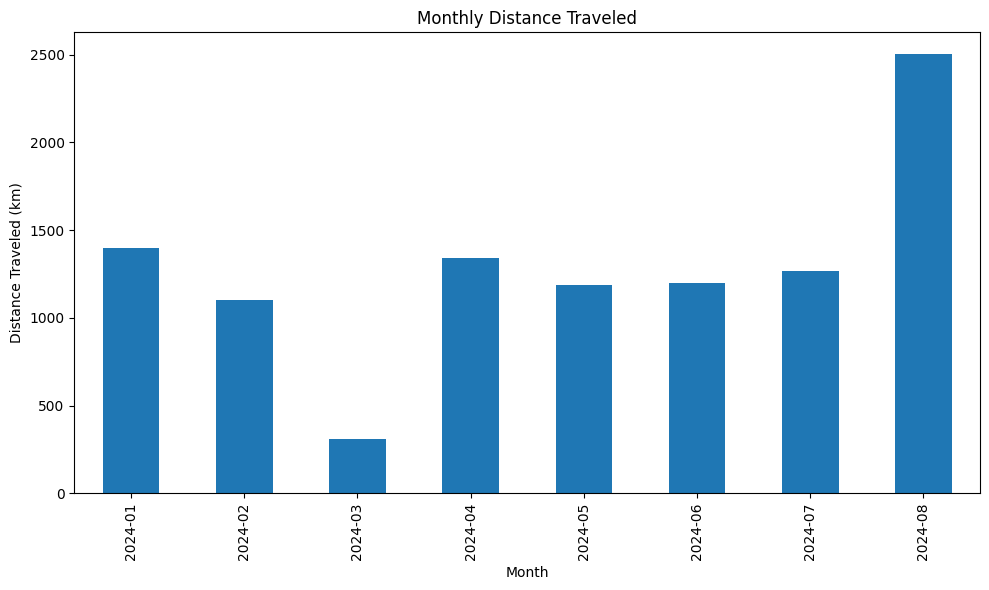

In [ ]:

import pandas as pd
import glob
import chardet
import matplotlib.pyplot as plt

# Define the path to the files
path = '/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/*.csv'

# Read all the files
files = glob.glob(path)

if not files:
    print("No files found")
else:
    dataframes = []
    for file in files:
        try:
            with open(file, 'rb') as f:
                result = chardet.detect(f.read())
                encoding = result['encoding']
                # Check if encoding was detected, if not, use a default
                if encoding is None:
                    encoding = 'latin-1' # Or any other encoding you suspect might be used

            # Try reading the file with different delimiters (comma and semicolon)
            try:
                df = pd.read_csv(file, encoding=encoding)
            except pd.errors.ParserError:
                df = pd.read_csv(file, encoding=encoding, delimiter=';')

            # Standardize column names (replace spaces with underscores and lowercase)
            df.columns = [col.replace(' ', '_').lower() for col in df.columns]

            # Handle missing values
            df = df.fillna(0)

            # Select relevant columns
            relevant_columns = ['id_camioneta', 'costo_gasolina_(mxn)', 'distancia_recorrida_(km)', 'mes_de_entrega', 'litros_consumidos']
            df = df[relevant_columns]

            dataframes.append(df)
        except pd.errors.ParserError as e:
          print(f"Error parsing file: {file}. Skipping...\n")
          print(f"Error message: {e}")


    if dataframes:
        df = pd.concat(dataframes, ignore_index=True)

        # Print available columns
        print("Available columns:")
        print(df.columns)

        # Check if 'id_camioneta', 'costo_gasolina_(mxn)', and 'distancia_recorrida_(km)' columns exist
        if not all(col in df.columns for col in ['id_camioneta', 'costo_gasolina_(mxn)', 'distancia_recorrida_(km)', 'mes_de_entrega', 'litros_consumidos']):
          print(f"Error: Missing columns in the dataframe. Available columns: {df.columns}")
        else:
          # Calculate average fuel consumption per truck
          avg_fuel_consumption = df.groupby('id_camioneta')['distancia_recorrida_(km)'].sum() / df.groupby('id_camioneta')['litros_consumidos'].sum()

          # Create bar chart
          plt.figure(figsize=(10,6))
          avg_fuel_consumption.plot(kind='bar')
          plt.title('Average Fuel Consumption per Truck')
          plt.xlabel('ID Camioneta')
          plt.ylabel('Average Fuel Consumption (MXN/km)')
          plt.xticks(rotation=90)
          plt.tight_layout()
          plt.show()
          print("\n")

          # Create scatter plot
          plt.figure(figsize=(10,6))
          plt.scatter(df['distancia_recorrida_(km)'], df['costo_gasolina_(mxn)'])
          plt.title('Distance Traveled vs Gas Consumption')
          plt.xlabel('Distance Traveled (km)')
          plt.ylabel('Gas Consumption (MXN)')
          plt.show()
          print("\n")

          # Calculate total distance traveled and total gas consumption
          total_distance = df['distancia_recorrida_(km)'].sum()
          total_gas_consumption = df['costo_gasolina_(mxn)'].sum()
          print(f"Total Distance Traveled: {total_distance} km")
          print(f"Total Gas Consumption: {total_gas_consumption} MXN")
          print("\n")

          # Calculate average distance traveled and average gas consumption per truck
          avg_distance = df.groupby('id_camioneta')['distancia_recorrida_(km)'].mean()
          avg_gas_consumption = df.groupby('id_camioneta')['costo_gasolina_(mxn)'].mean()
          print(f"Average Distance Traveled per Truck: {avg_distance.mean()} km")
          print(f"Average Gas Consumption per Truck: {avg_gas_consumption.mean()} MXN")
          print("\n")

          # Calculate monthly distance traveled and gas consumption
          monthly_distance = df.groupby('mes_de_entrega')['distancia_recorrida_(km)'].sum()
          monthly_gas_consumption = df.groupby('mes_de_entrega')['costo_gasolina_(mxn)'].sum()

          # Create bar chart for monthly distance traveled
          print("\n")
          plt.figure(figsize=(10,6))
          monthly_distance.plot(kind='bar')
          plt.title('Monthly Distance Traveled')
          plt.xlabel('Month')
          plt.ylabel('Distance Traveled (km)')
          plt.xticks(rotation=90)
          plt.tight_layout()
          plt.show()
          print("\n")




porque hay un aumento de cosas, al tomar decisiones hay que comenzar a preguntar el porque de las cosas, como porque en 2024-08 hubo mas y en 03




---

# New Version

---



In [ ]:
import pandas as pd

# Replace 'your_file.csv' with the actual file name
file_path = '/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/EntoAug3.csv'

try:
    # Try reading the file with comma delimiter, only read the header
    df = pd.read_csv(file_path, nrows=0)
except pd.errors.ParserError:
    # If comma delimiter fails, try semicolon delimiter
    df = pd.read_csv(file_path, delimiter=';', nrows=0)

# Standardize column names
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

# Save the DataFrame to a CSV file
df.to_csv('column_headers.csv', index=False)

print("Available columns:")
for column in df.columns:
    print(column)

Available columns:
fecha_de_entrega
id_camioneta
municipio_de_destino
distancia_recorrida_(km)
velocidad_promedio_(km/h)
precio_gasolina_(mxn/litro)
costo_gasolina_(mxn)
costo_conductor_(mxn)
costo_mantenimiento_(mxn)
costo_total_(mxn)
peso_de_carga_(kg)
arroz_kg
frijol_kg
aceite_lt
leche_lt
huevo_kg
pasta_para_sopa_kg
atun_en_agua_kg
lenteja_kg
avena_en_hojuelas_kg
garbanzo_kg
haba_kg
harina_de_amaranto_kg
jitomate_kg
chayote_kg
manzana_kg
jicama_kg
pepino_kg
cebolla_kg
zanahoria_kg
costo_arroz_kg
precio_venta_arroz_kg
utilidad_arroz_kg
costo_frijol_kg
precio_venta_frijol_kg
utilidad_frijol_kg
costo_aceite_litros
precio_venta_aceite_litros
utilidad_aceite_litros
costo_leche_litros
precio_venta_leche_litros
utilidad_leche_litros
costo_huevo_kg
precio_venta_huevo_kg
utilidad_huevo_kg
costo_pasta_para_sopa_kg
precio_venta_pasta_para_sopa_kg
utilidad_pasta_para_sopa_kg
costo_atun_en_agua_kg
precio_venta_atun_en_agua_kg
utilidad_atun_en_agua_kg
costo_lenteja_kg
precio_venta_lenteja_kg
util

The product with the most kg transported is: leche_lt




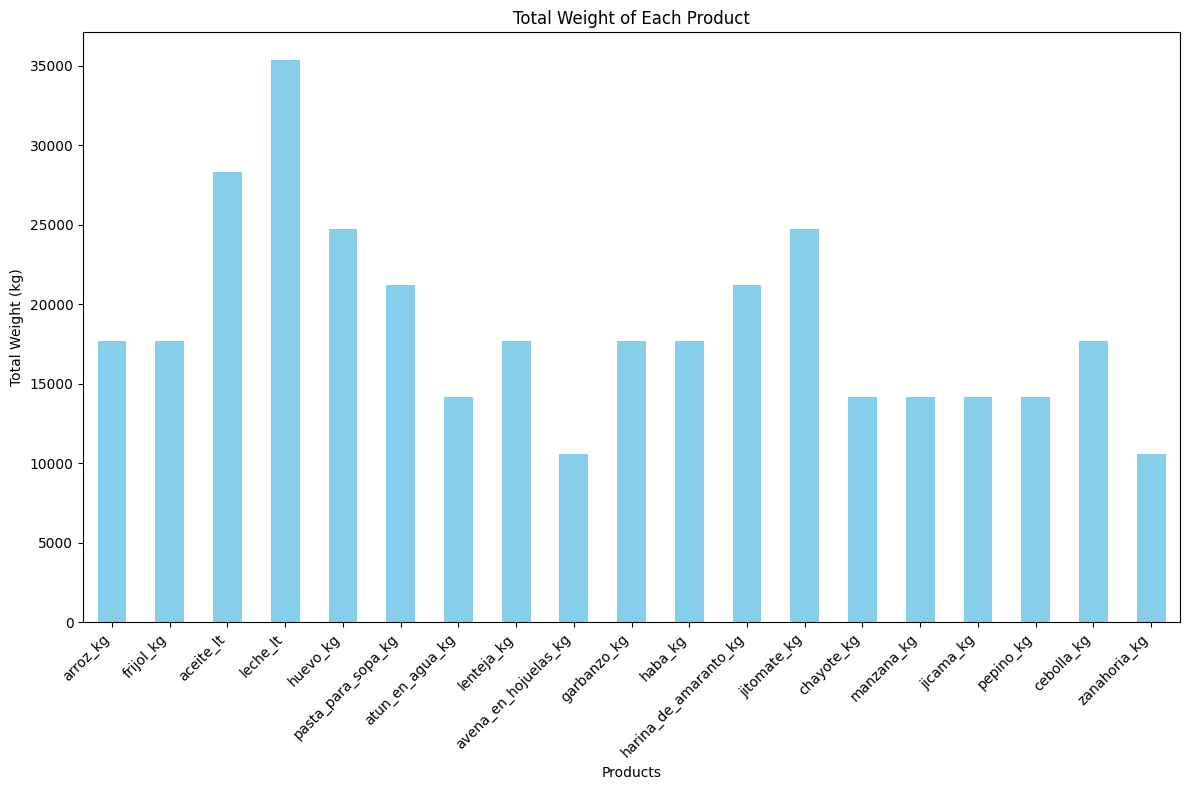

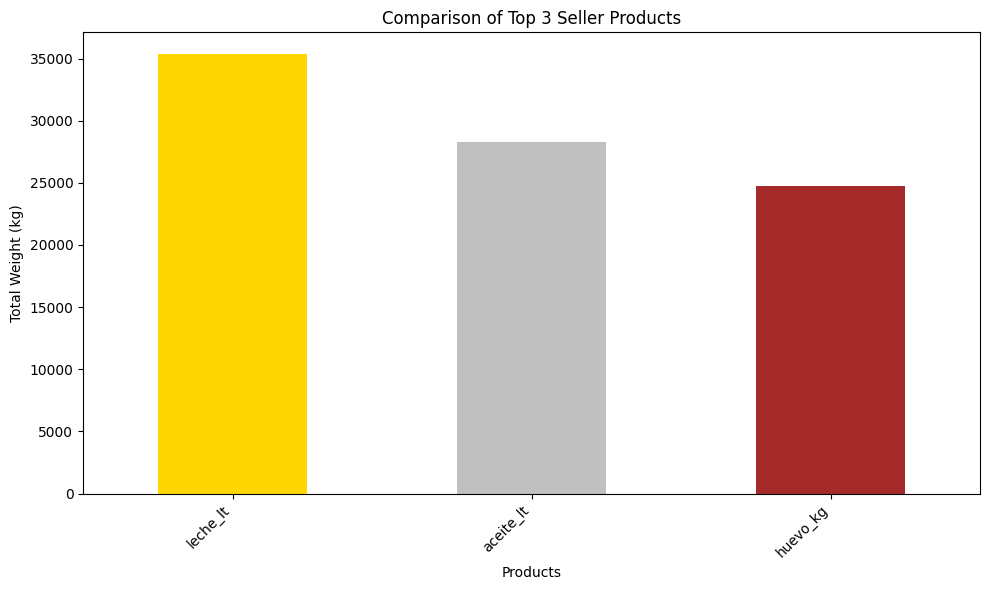

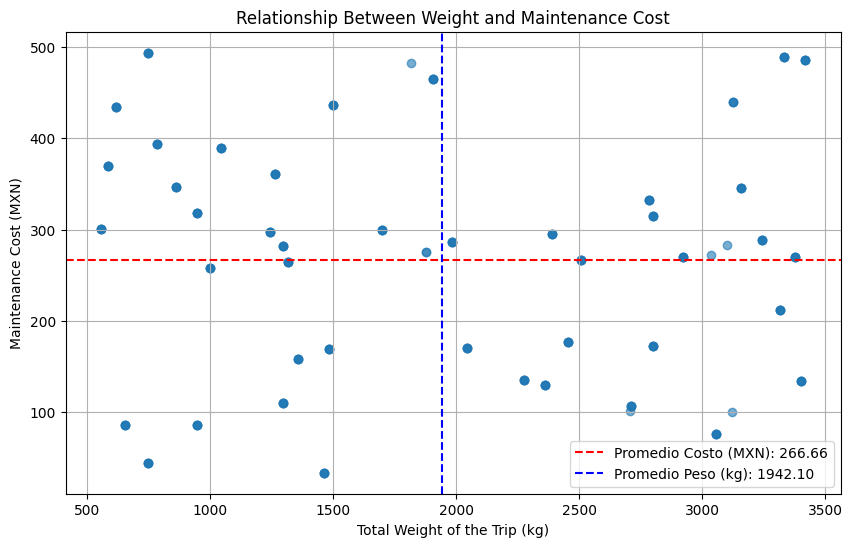

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Replace 'your_file.csv' with the actual file name
file_path = '/content/drive/MyDrive/Colab Notebooks/InteligenciaEnNegocios/EntoAug3.csv'

try:
    # Try reading the file with comma delimiter
    df = pd.read_csv(file_path)
except pd.errors.ParserError:
    # If comma delimiter fails, try semicolon delimiter
    df = pd.read_csv(file_path, delimiter=';')

# Standardize column names
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

# Select columns with product weight information
product_columns = [
    'arroz_kg', 'frijol_kg', 'aceite_lt', 'leche_lt', 'huevo_kg',
    'pasta_para_sopa_kg', 'atun_en_agua_kg', 'lenteja_kg', 'avena_en_hojuelas_kg',
    'garbanzo_kg', 'haba_kg', 'harina_de_amaranto_kg', 'jitomate_kg',
    'chayote_kg', 'manzana_kg', 'jicama_kg', 'pepino_kg', 'cebolla_kg',
    'zanahoria_kg'
]

# Calculate total weight for each product
total_weight_per_product = df[product_columns].sum()

# Find the product with the highest total weight
product_most_kg = total_weight_per_product.idxmax()

print(f"The product with the most kg transported is: {product_most_kg}")
print("\n")

# Get the top 3 products
total_weight_per_product = df[product_columns].sum()
top_3_products = total_weight_per_product.nlargest(3)
top_3_product_columns = top_3_products.index

# Transpose the DataFrame and select top 3 products
df_top3 = df[top_3_product_columns].T

"""
# Create a stacked area chart for the top 3 products
plt.figure(figsize=(10, 6))
# Transpose the df_top3 DataFrame so the shapes are compatible
plt.stackplot(range(len(df_top3.columns)), df_top3.values,
              labels=top_3_product_columns)
plt.legend(loc='upper left')
plt.xlabel("Trips")
plt.ylabel("Weight (kg)")
plt.title("Stacked Area Chart of Top 3 Products")
plt.show()
"""

# Create a bar chart for the total weight of each product
plt.figure(figsize=(12, 8))
total_weight_per_product.plot(kind='bar', color='skyblue')
plt.xlabel("Products")
plt.ylabel("Total Weight (kg)")
plt.title("Total Weight of Each Product")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n")

# Create a bar chart comparing the top 3 seller products
plt.figure(figsize=(10, 6))
top_3_products.plot(kind='bar', color=['gold', 'silver', 'brown'])
plt.xlabel("Products")
plt.ylabel("Total Weight (kg)")
plt.title("Comparison of Top 3 Seller Products")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("\n")

plt.figure(figsize=(10, 6))
plt.scatter(df['peso_de_carga_(kg)'],
            df['costo_mantenimiento_(mxn)'], alpha=0.6)

# Calcular promedios
avg_weight = df['peso_de_carga_(kg)'].mean()
avg_cost = df['costo_mantenimiento_(mxn)'].mean()

# Añadir líneas de promedio
plt.axhline(y=avg_cost, color='r', linestyle='--',
            label=f'Promedio Costo (MXN): {avg_cost:.2f}')
plt.axvline(x=avg_weight, color='b', linestyle='--',
            label=f'Promedio Peso (kg): {avg_weight:.2f}')

plt.xlabel('Total Weight of the Trip (kg)')
plt.ylabel('Maintenance Cost (MXN)')
plt.title('Relationship Between Weight and Maintenance Cost')
plt.grid(True)
plt.legend()
plt.show()
print("\n")


The average cost per km is: 6.89 MXN/km
The average gas cost per km is: 4.44 MXN/km


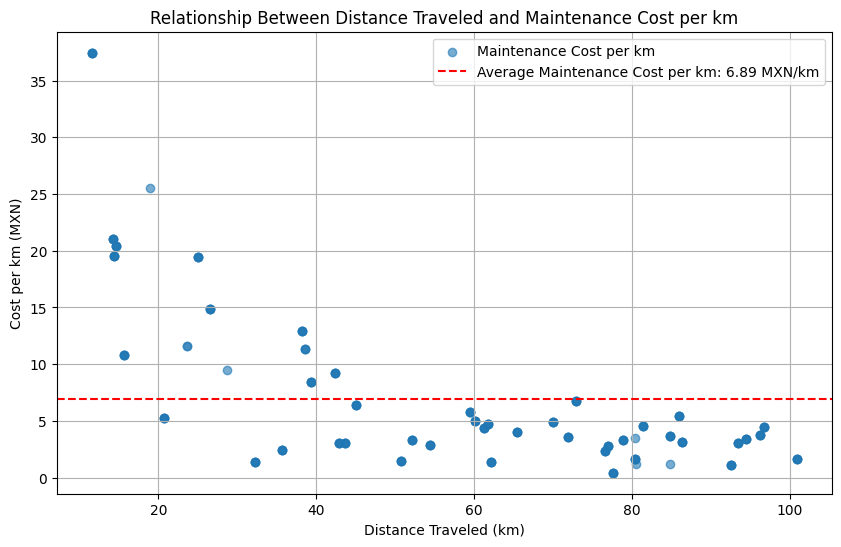

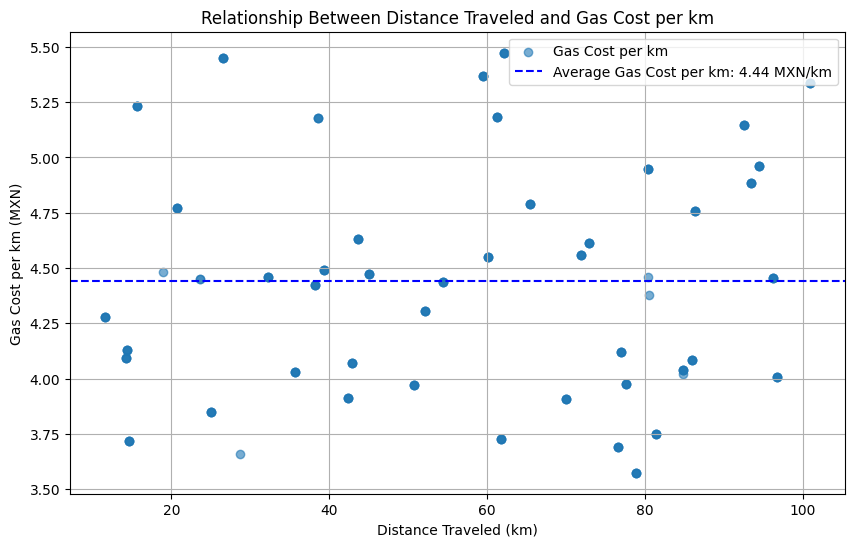

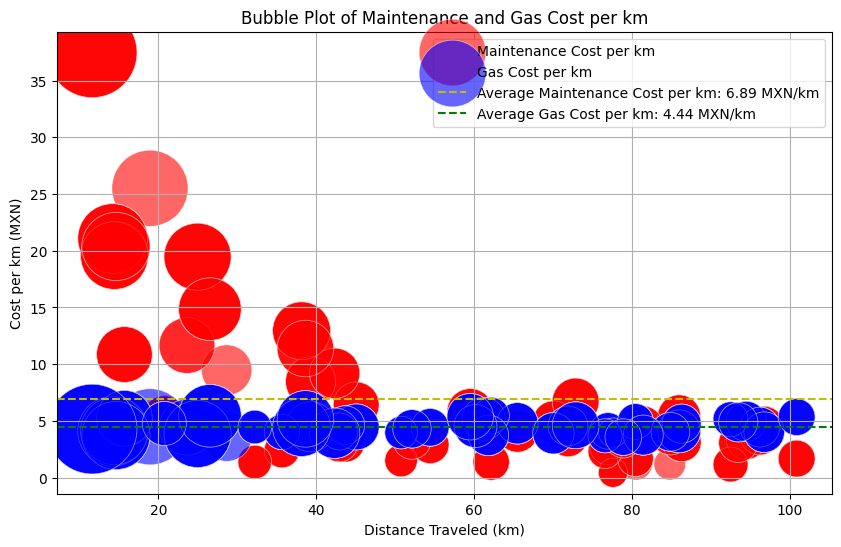

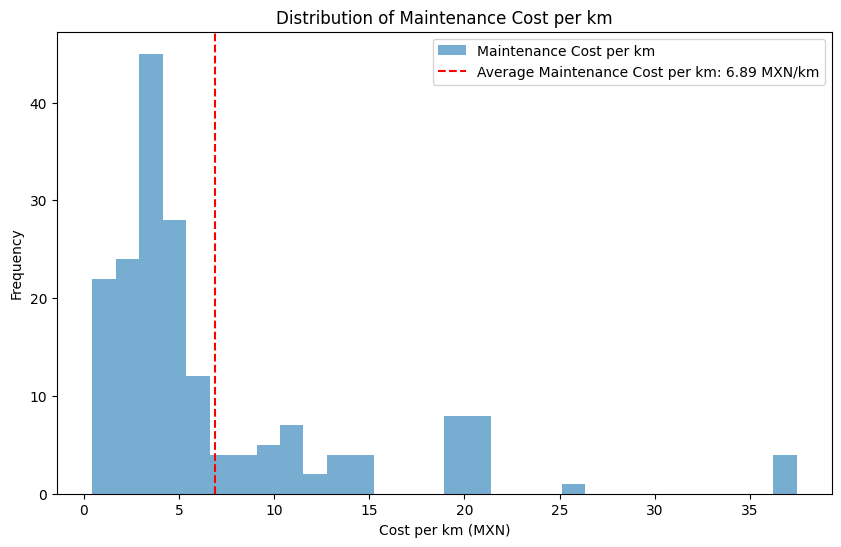

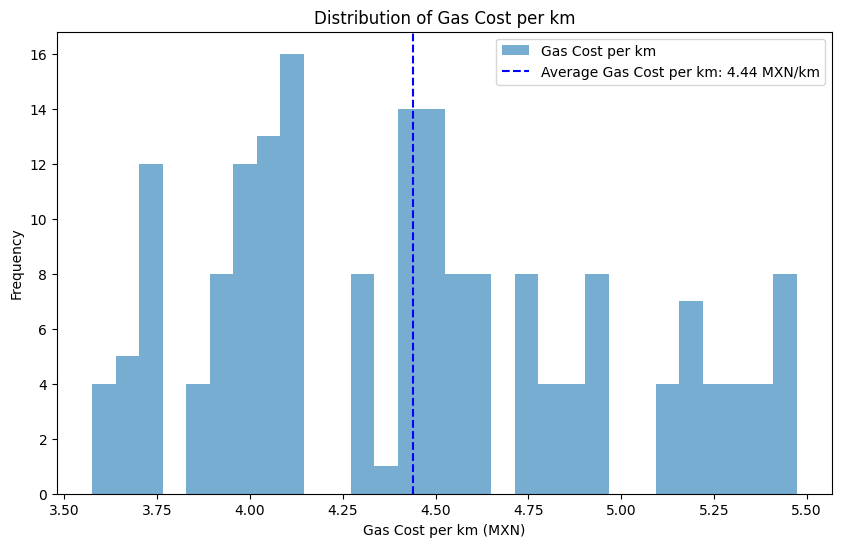

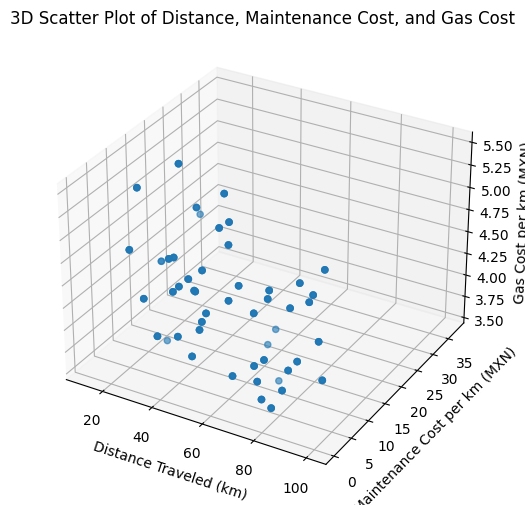

In [ ]:

# Calcular el costo por km para cada viaje
df['cost_per_km'] = df['costo_mantenimiento_(mxn)'] / \
    df['distancia_recorrida_(km)']

# Calcular el costo por km para el gas
df['gas_cost_per_km'] = df['costo_gasolina_(mxn)'] / df['distancia_recorrida_(km)']

# Calcular el promedio del costo por km
average_cost_per_km = df['cost_per_km'].mean()
average_gas_cost_per_km = df['gas_cost_per_km'].mean()

print(f"The average cost per km is: {average_cost_per_km:.2f} MXN/km")
print(f"The average gas cost per km is: {average_gas_cost_per_km:.2f} MXN/km")

# Gráfico de dispersión para el costo de mantenimiento por km
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'], df['cost_per_km'],
            alpha=0.6, label='Maintenance Cost per km')
plt.axhline(y=average_cost_per_km, color='r', linestyle='--',
            label=f'Average Maintenance Cost per km: {average_cost_per_km:.2f} MXN/km')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Cost per km (MXN)')
plt.title('Relationship Between Distance Traveled and Maintenance Cost per km')
plt.grid(True)
plt.legend()
plt.show()
print("\n")

# Gráfico de dispersión para el costo de gasolina por km
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'],
            df['gas_cost_per_km'], alpha=0.6, label='Gas Cost per km')
plt.axhline(y=average_gas_cost_per_km, color='b', linestyle='--',
            label=f'Average Gas Cost per km: {average_gas_cost_per_km:.2f} MXN/km')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Gas Cost per km (MXN)')
plt.title('Relationship Between Distance Traveled and Gas Cost per km')
plt.grid(True)
plt.legend()
plt.show()
print("\n")

# Calcular el costo total por km
df['total_cost_per_km'] = df['cost_per_km'] + df['gas_cost_per_km']

# Gráfico de burbujas para el costo total por km
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'], df['cost_per_km'],
            s=df['total_cost_per_km']*100, alpha=0.6, label='Maintenance Cost per km', c='r', edgecolors='w', linewidth=0.5)
plt.scatter(df['distancia_recorrida_(km)'], df['gas_cost_per_km'],
            s=df['total_cost_per_km']*100, alpha=0.6, label='Gas Cost per km', c='b', edgecolors='w', linewidth=0.5)
plt.axhline(y=average_cost_per_km, color='y', linestyle='--', label=f'Average Maintenance Cost per km: {average_cost_per_km:.2f} MXN/km')
plt.axhline(y=average_gas_cost_per_km, color='g', linestyle='--', label=f'Average Gas Cost per km: {average_gas_cost_per_km:.2f} MXN/km')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Cost per km (MXN)')
plt.title('Bubble Plot of Maintenance and Gas Cost per km')
plt.grid(True)
plt.legend()
plt.show()
print("\n")

plt.figure(figsize=(10, 6))
plt.hist(df['cost_per_km'], bins=30, alpha=0.6, label='Maintenance Cost per km')
plt.axvline(x=average_cost_per_km, color='r', linestyle='--', label=f'Average Maintenance Cost per km: {average_cost_per_km:.2f} MXN/km')
plt.xlabel('Cost per km (MXN)')
plt.ylabel('Frequency')
plt.title('Distribution of Maintenance Cost per km')
plt.legend()
plt.show()
print("\n")

plt.figure(figsize=(10, 6))
plt.hist(df['gas_cost_per_km'], bins=30, alpha=0.6, label='Gas Cost per km')
plt.axvline(x=average_gas_cost_per_km, color='b', linestyle='--', label=f'Average Gas Cost per km: {average_gas_cost_per_km:.2f} MXN/km')
plt.xlabel('Gas Cost per km (MXN)')
plt.ylabel('Frequency')
plt.title('Distribution of Gas Cost per km')
plt.legend()
plt.show()
print("\n")

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['distancia_recorrida_(km)'], df['cost_per_km'], df['gas_cost_per_km'], alpha=0.6)
ax.set_xlabel('Distance Traveled (km)')
ax.set_ylabel('Maintenance Cost per km (MXN)')
ax.set_zlabel('Gas Cost per km (MXN)')
ax.set_title('3D Scatter Plot of Distance, Maintenance Cost, and Gas Cost')
plt.show()
print("\n")

The average cost per km is: 6.89 MXN/km
The average gas cost per km is: 4.44 MXN/km


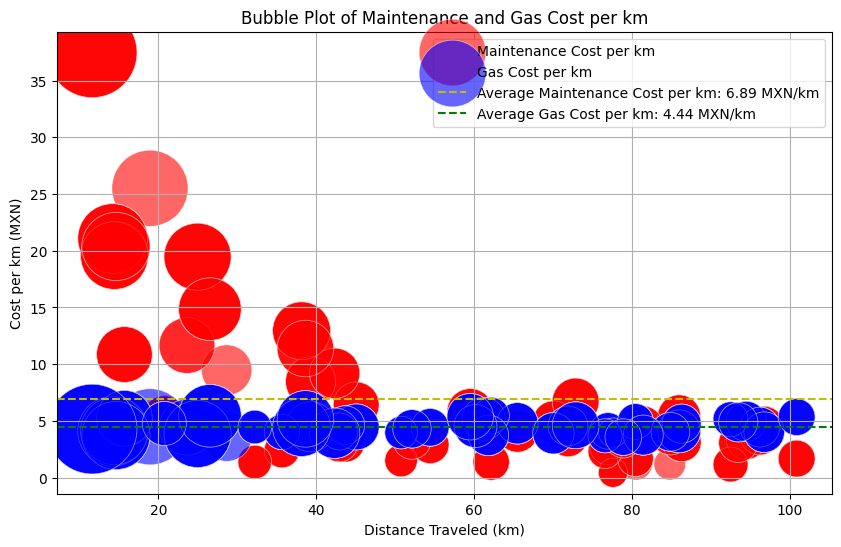

In [ ]:
# Calcular el costo por km para cada viaje
df['cost_per_km'] = df['costo_mantenimiento_(mxn)'] / df['distancia_recorrida_(km)']

# Calcular el costo por km para el gas
df['gas_cost_per_km'] = df['costo_gasolina_(mxn)'] / df['distancia_recorrida_(km)']

# Calcular el promedio del costo por km
average_cost_per_km = df['cost_per_km'].mean()
average_gas_cost_per_km = df['gas_cost_per_km'].mean()

print(f"The average cost per km is: {average_cost_per_km:.2f} MXN/km")
print(f"The average gas cost per km is: {average_gas_cost_per_km:.2f} MXN/km")


# Calcular el costo total por km
df['total_cost_per_km'] = df['cost_per_km'] + df['gas_cost_per_km']

# Gráfico de burbujas para el costo total por km
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'], df['cost_per_km'],
            s=df['total_cost_per_km']*100, alpha=0.6, label='Maintenance Cost per km', c='r', edgecolors='w', linewidth=0.5)
plt.scatter(df['distancia_recorrida_(km)'], df['gas_cost_per_km'],
            s=df['total_cost_per_km']*100, alpha=0.6, label='Gas Cost per km', c='b', edgecolors='w', linewidth=0.5)
plt.axhline(y=average_cost_per_km, color='y', linestyle='--', label=f'Average Maintenance Cost per km: {average_cost_per_km:.2f} MXN/km')
plt.axhline(y=average_gas_cost_per_km, color='g', linestyle='--', label=f'Average Gas Cost per km: {average_gas_cost_per_km:.2f} MXN/km')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Cost per km (MXN)')
plt.title('Bubble Plot of Maintenance and Gas Cost per km')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-92-2fd2a5ef7ec7>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_trips['cost_per_km'] = short_trips['costo_mantenimiento_(mxn)'] / short_trips['distancia_recorrida_(km)']


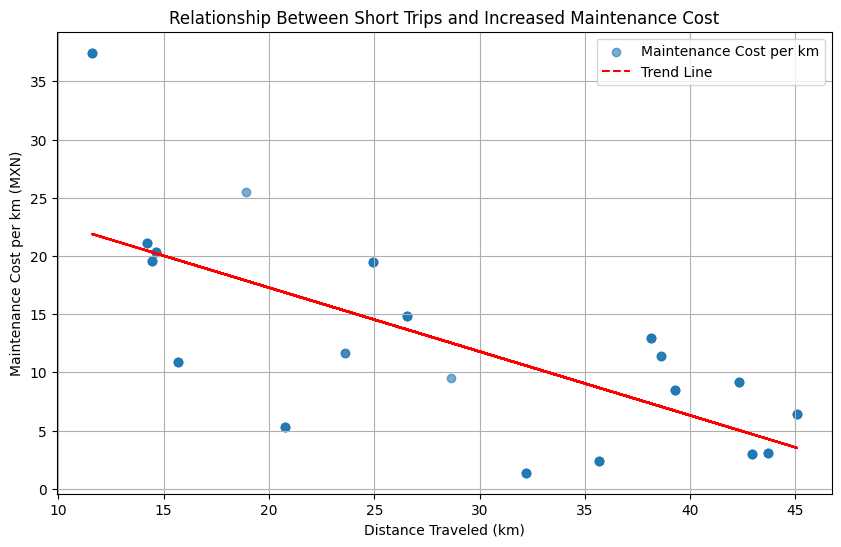

In [ ]:
# Definir un umbral para considerar un viaje como corto (por ejemplo, menos de 50 km)
short_trip_threshold = 50

# Filtrar los datos para obtener solo los viajes cortos
short_trips = df[df['distancia_recorrida_(km)'] < short_trip_threshold]

# Calcular el costo de mantenimiento por km para los viajes cortos
short_trips['cost_per_km'] = short_trips['costo_mantenimiento_(mxn)'] / short_trips['distancia_recorrida_(km)']

# Crear un gráfico de dispersión para los viajes cortos
plt.figure(figsize=(10, 6))
plt.scatter(short_trips['distancia_recorrida_(km)'], short_trips['cost_per_km'], alpha=0.6, label='Maintenance Cost per km')

# Añadir una línea de tendencia
z = np.polyfit(short_trips['distancia_recorrida_(km)'], short_trips['cost_per_km'], 1)
p = np.poly1d(z)
plt.plot(short_trips['distancia_recorrida_(km)'], p(short_trips['distancia_recorrida_(km)']), "r--", label='Trend Line')

plt.xlabel('Distance Traveled (km)')
plt.ylabel('Maintenance Cost per km (MXN)')
plt.title('Relationship Between Short Trips and Increased Maintenance Cost')
plt.grid(True)
plt.legend()
plt.show()

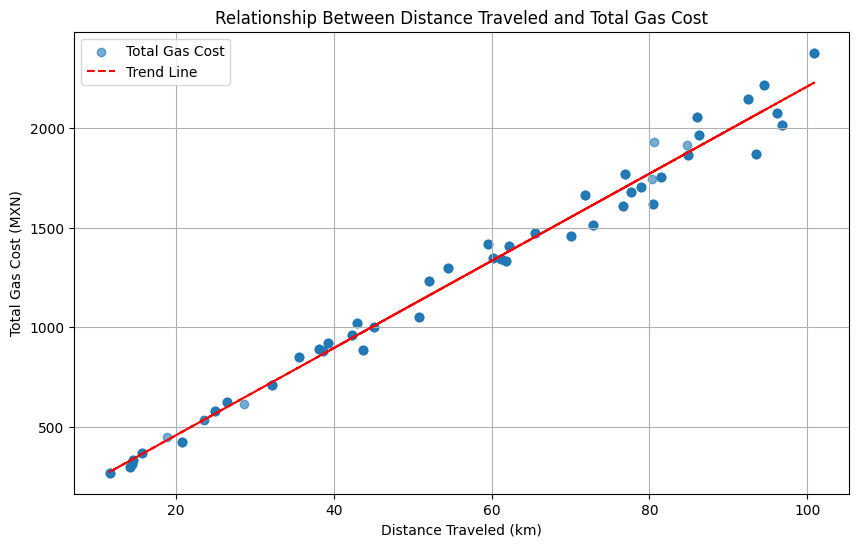

In [ ]:
# Calcular el costo total de gasolina para cada viaje
df['total_gas_cost'] = df['precio_gasolina_(mxn/litro)'] * df['distancia_recorrida_(km)']

# Crear un gráfico de dispersión para la relación entre la distancia recorrida y el costo total de gasolina
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'], df['total_gas_cost'], alpha=0.6, label='Total Gas Cost')

# Añadir una línea de tendencia
z = np.polyfit(df['distancia_recorrida_(km)'], df['total_gas_cost'], 1)
p = np.poly1d(z)
plt.plot(df['distancia_recorrida_(km)'], p(df['distancia_recorrida_(km)']), "r--", label='Trend Line')

plt.xlabel('Distance Traveled (km)')
plt.ylabel('Total Gas Cost (MXN)')
plt.title('Relationship Between Distance Traveled and Total Gas Cost')
plt.grid(True)
plt.legend()
plt.show()

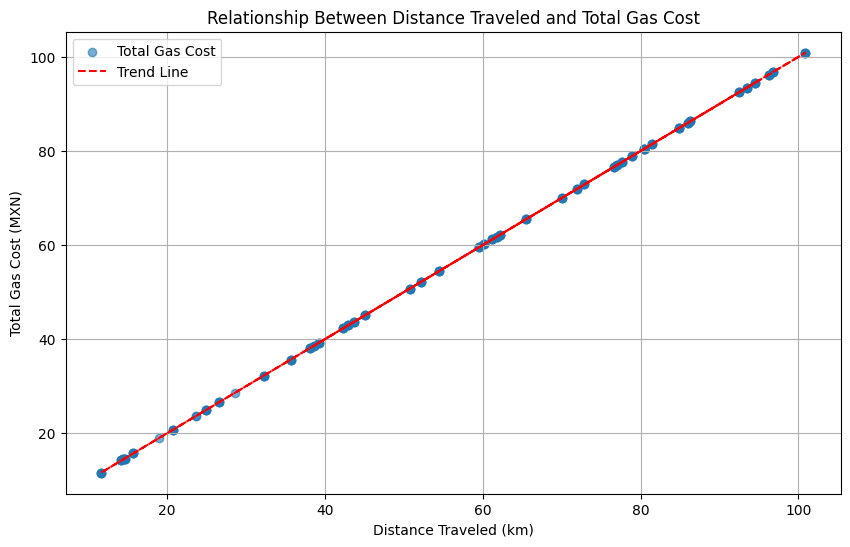

In [ ]:
# Calcular el costo total de gasolina para cada viaje
df['total_gas_cost'] = df['distancia_recorrida_(km)']

# Crear un gráfico de dispersión para la relación entre la distancia recorrida y el costo total de gasolina
plt.figure(figsize=(10, 6))
plt.scatter(df['distancia_recorrida_(km)'], df['total_gas_cost'], alpha=0.6, label='Total Gas Cost')

# Añadir una línea de tendencia
z = np.polyfit(df['distancia_recorrida_(km)'], df['total_gas_cost'], 1)
p = np.poly1d(z)
plt.plot(df['distancia_recorrida_(km)'], p(df['distancia_recorrida_(km)']), "r--", label='Trend Line')

plt.xlabel('Distance Traveled (km)')
plt.ylabel('Total Gas Cost (MXN)')
plt.title('Relationship Between Distance Traveled and Total Gas Cost')
plt.grid(True)
plt.legend()
plt.show()
plt.show()
print("\n")

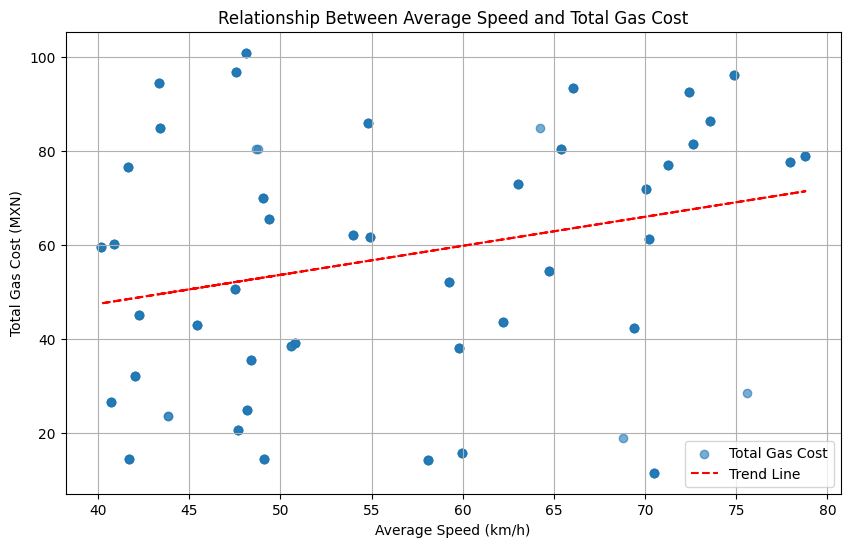

In [ ]:
# Calcular el costo total de gasolina para cada viaje
df['total_gas_cost'] = df['distancia_recorrida_(km)']

# Gráfico de dispersión para la relación entre la velocidad promedio y el costo total de gasolina
plt.figure(figsize=(10, 6))
plt.scatter(df['velocidad_promedio_(km/h)'], df['total_gas_cost'], alpha=0.6, label='Total Gas Cost')

# Añadir una línea de tendencia
z = np.polyfit(df['velocidad_promedio_(km/h)'], df['total_gas_cost'], 1)
p = np.poly1d(z)
plt.plot(df['velocidad_promedio_(km/h)'], p(df['velocidad_promedio_(km/h)']), "r--", label='Trend Line')

plt.xlabel('Average Speed (km/h)')
plt.ylabel('Total Gas Cost (MXN)')
plt.title('Relationship Between Average Speed and Total Gas Cost')
plt.grid(True)
plt.legend()
plt.show()

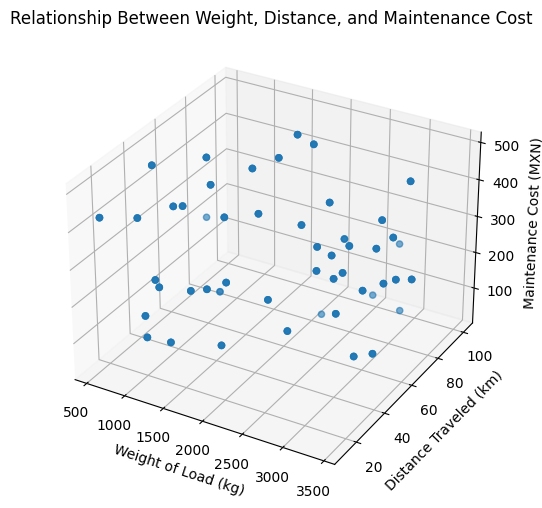

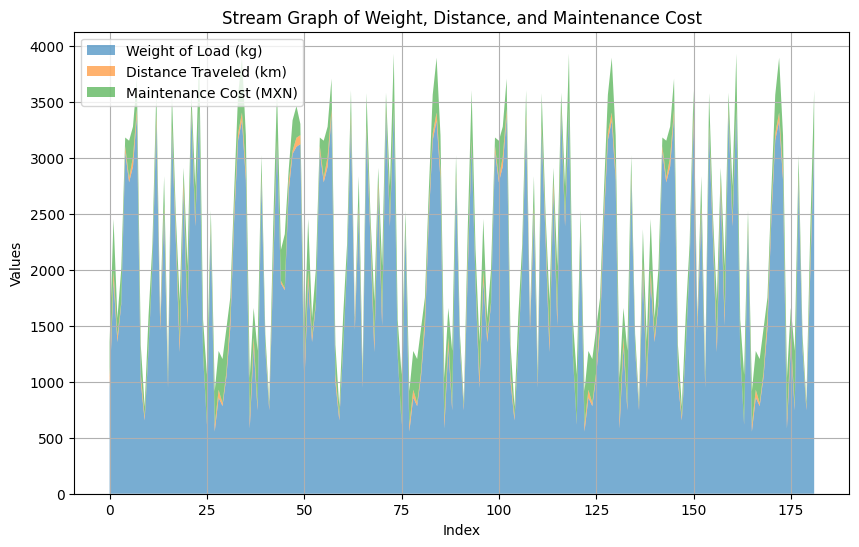

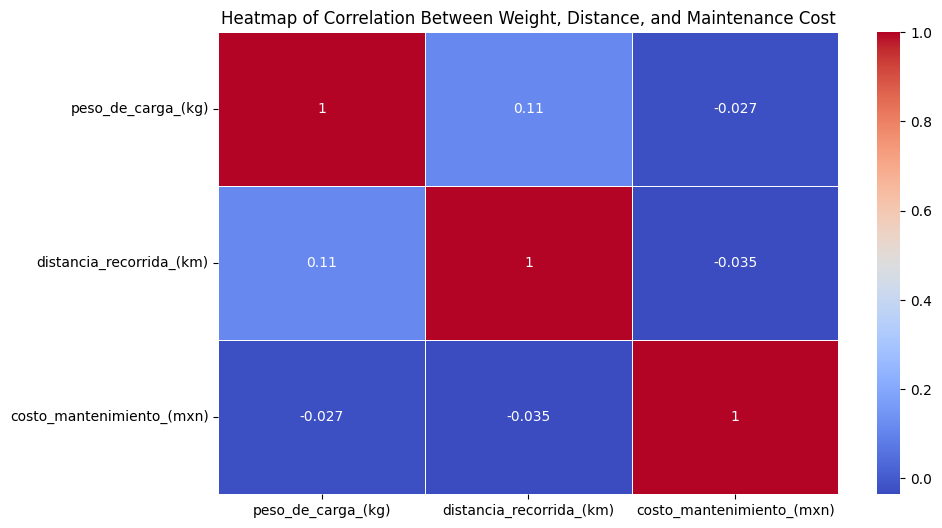

In [ ]:
# Crear una figura y un eje 3D
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Graficar la relación entre peso, distancia y costo de mantenimiento
ax.scatter(df['peso_de_carga_(kg)'], df['distancia_recorrida_(km)'], df['costo_mantenimiento_(mxn)'], alpha=0.6)

# Configurar etiquetas de los ejes
ax.set_xlabel('Weight of Load (kg)')
ax.set_ylabel('Distance Traveled (km)')
ax.set_zlabel('Maintenance Cost (MXN)')
ax.set_title('Relationship Between Weight, Distance, and Maintenance Cost')

# Mostrar el gráfico
plt.show()
plt.show()
print("\n")


# Crear un DataFrame con los datos necesarios
data = df[['peso_de_carga_(kg)', 'distancia_recorrida_(km)', 'costo_mantenimiento_(mxn)']]

# Crear un gráfico de área apilada (stream graph)
plt.figure(figsize=(10, 6))
plt.stackplot(data.index, data['peso_de_carga_(kg)'], data['distancia_recorrida_(km)'], data['costo_mantenimiento_(mxn)'],
              labels=['Weight of Load (kg)', 'Distance Traveled (km)', 'Maintenance Cost (MXN)'], alpha=0.6)

# Configurar etiquetas de los ejes
plt.xlabel('Index')
plt.ylabel('Values')
plt.title('Stream Graph of Weight, Distance, and Maintenance Cost')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()
plt.show()
print("\n")

# Crear una matriz de correlación para las variables de interés
correlation_matrix = df[['peso_de_carga_(kg)', 'distancia_recorrida_(km)', 'costo_mantenimiento_(mxn)']].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Configurar etiquetas y título del gráfico
plt.title('Heatmap of Correlation Between Weight, Distance, and Maintenance Cost')
plt.show()
plt.show()
print("\n")

Estadísticas descriptivas para viajes cortos:
count     71.000000
mean     283.325493
std      140.950007
min       44.330000
25%      134.330000
50%      297.900000
75%      393.970000
max      493.770000
Name: costo_mantenimiento_(mxn), dtype: float64
Estadísticas descriptivas para viajes largos:
count    111.000000
mean     255.999369
std      116.811546
min       33.670000
25%      169.270000
50%      269.930000
75%      331.850000
max      489.270000
Name: costo_mantenimiento_(mxn), dtype: float64


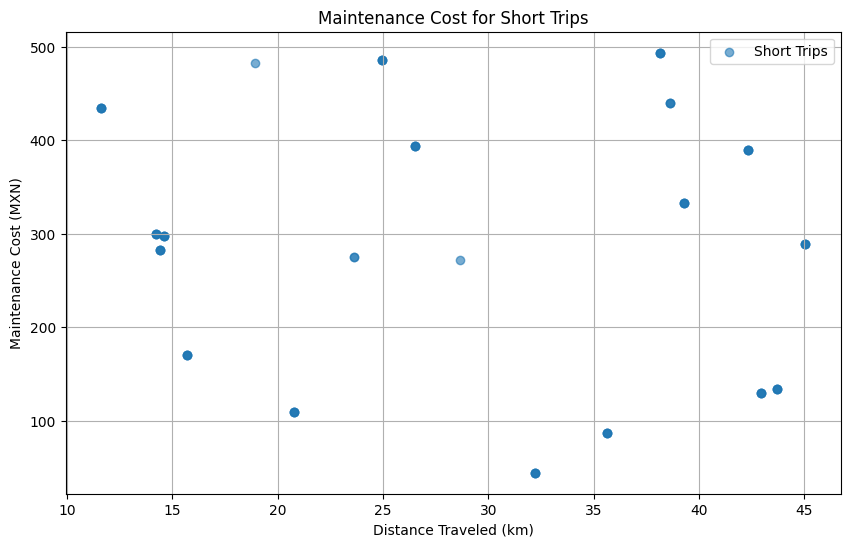

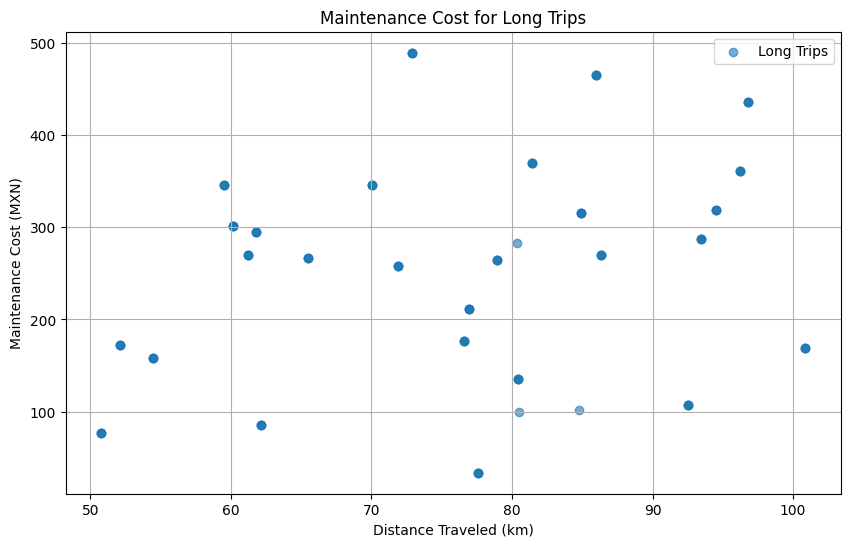

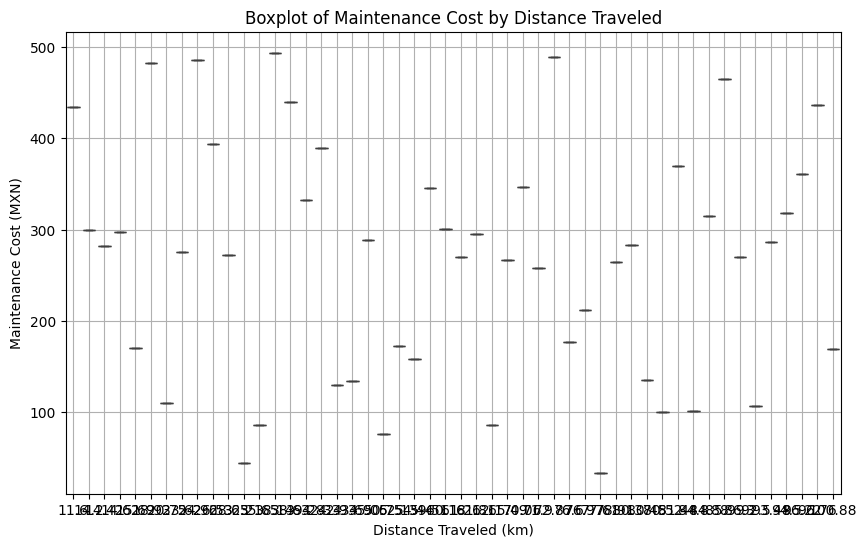

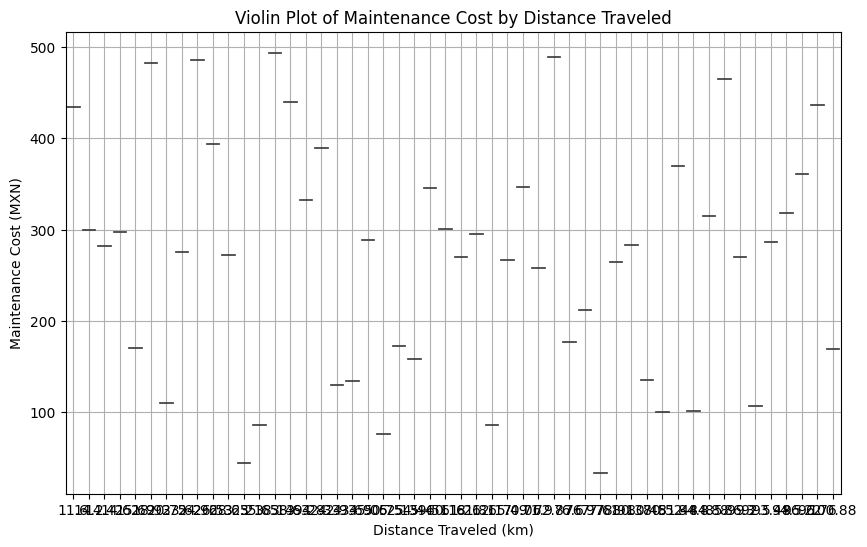

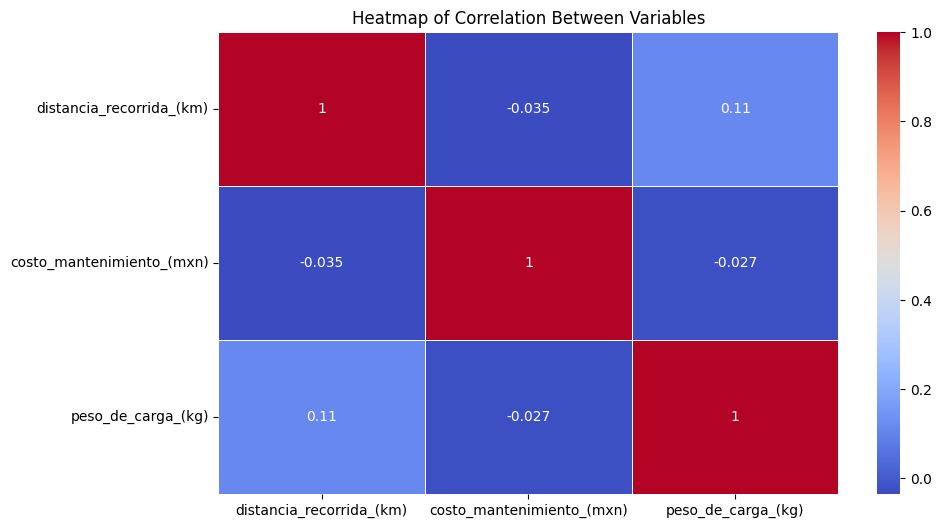

In [ ]:
#analisis descriptivo

# Calcular estadísticas descriptivas
short_trips = df[df['distancia_recorrida_(km)'] < 50]
long_trips = df[df['distancia_recorrida_(km)'] >= 50]

print("Estadísticas descriptivas para viajes cortos:")
print(short_trips['costo_mantenimiento_(mxn)'].describe())

print("Estadísticas descriptivas para viajes largos:")
print(long_trips['costo_mantenimiento_(mxn)'].describe())

import matplotlib.pyplot as plt

# Gráfico de dispersión para viajes cortos
plt.figure(figsize=(10, 6))
plt.scatter(short_trips['distancia_recorrida_(km)'], short_trips['costo_mantenimiento_(mxn)'], alpha=0.6, label='Short Trips')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Maintenance Cost (MXN)')
plt.title('Maintenance Cost for Short Trips')
plt.grid(True)
plt.legend()
plt.show()
print("\n")

# Gráfico de dispersión para viajes largos
plt.figure(figsize=(10, 6))
plt.scatter(long_trips['distancia_recorrida_(km)'], long_trips['costo_mantenimiento_(mxn)'], alpha=0.6, label='Long Trips')
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Maintenance Cost (MXN)')
plt.title('Maintenance Cost for Long Trips')
plt.grid(True)
plt.legend()
plt.show()
print("\n")


# Gráfico de caja para comparar costos de mantenimiento
plt.figure(figsize=(10, 6))
sns.boxplot(x='distancia_recorrida_(km)', y='costo_mantenimiento_(mxn)', data=df)
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Maintenance Cost (MXN)')
plt.title('Boxplot of Maintenance Cost by Distance Traveled')
plt.grid(True)
plt.show()
print("\n")

# Gráfico de violín para comparar costos de mantenimiento
plt.figure(figsize=(10, 6))
sns.violinplot(x='distancia_recorrida_(km)', y='costo_mantenimiento_(mxn)', data=df)
plt.xlabel('Distance Traveled (km)')
plt.ylabel('Maintenance Cost (MXN)')
plt.title('Violin Plot of Maintenance Cost by Distance Traveled')
plt.grid(True)
plt.show()
print("\n")

# Calcular la matriz de correlación
correlation_matrix = df[['distancia_recorrida_(km)', 'costo_mantenimiento_(mxn)', 'peso_de_carga_(kg)']].corr()

# Crear un heatmap para visualizar la matriz de correlación
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Between Variables')
plt.show()

El producto con la mayor utilidad en general es: utilidad_atun_en_agua_kg con una utilidad total de: 7809.84 MXN
Producto con mayor utilidad en cada viaje:
      producto_mayor_utilidad  mayor_utilidad_por_viaje
0    utilidad_atun_en_agua_kg                     42.50
1    utilidad_atun_en_agua_kg                     42.93
2    utilidad_atun_en_agua_kg                     43.09
3    utilidad_atun_en_agua_kg                     42.56
4    utilidad_atun_en_agua_kg                     42.80
..                        ...                       ...
177  utilidad_atun_en_agua_kg                     42.62
178  utilidad_atun_en_agua_kg                     43.23
179  utilidad_atun_en_agua_kg                     42.99
180  utilidad_atun_en_agua_kg                     42.98
181  utilidad_atun_en_agua_kg                     43.26

[182 rows x 2 columns]


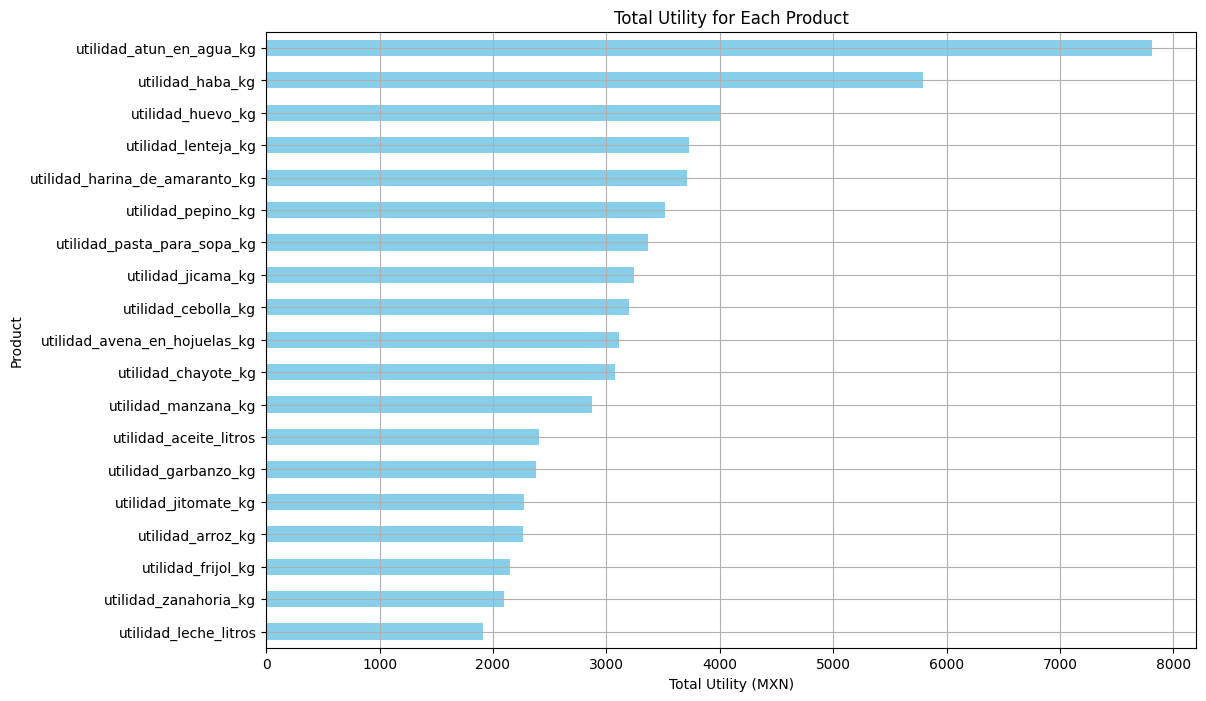

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_arroz_kg', 'utilidad_frijol_kg', 'utilidad_aceite_litros', 'utilidad_leche_litros',
    'utilidad_huevo_kg', 'utilidad_pasta_para_sopa_kg', 'utilidad_atun_en_agua_kg', 'utilidad_lenteja_kg',
    'utilidad_avena_en_hojuelas_kg', 'utilidad_garbanzo_kg', 'utilidad_haba_kg', 'utilidad_harina_de_amaranto_kg',
    'utilidad_jitomate_kg', 'utilidad_chayote_kg', 'utilidad_manzana_kg', 'utilidad_jicama_kg',
    'utilidad_pepino_kg', 'utilidad_cebolla_kg', 'utilidad_zanahoria_kg'
]

# Calcular la utilidad total para cada producto en cada viaje
df['utilidad_total'] = df[productos].sum(axis=1)

# Calcular la utilidad total acumulada para cada producto en todos los viajes
utilidad_acumulada = df[productos].sum()

# Identificar el producto con la mayor utilidad en general
producto_mayor_utilidad = utilidad_acumulada.idxmax()
mayor_utilidad = utilidad_acumulada.max()

print(f"El producto con la mayor utilidad en general es: {producto_mayor_utilidad} con una utilidad total de: {mayor_utilidad:.2f} MXN")

# Identificar el producto con la mayor utilidad en cada viaje
df['producto_mayor_utilidad'] = df[productos].idxmax(axis=1)
df['mayor_utilidad_por_viaje'] = df[productos].max(axis=1)

# Visualizar los resultados
print("Producto con mayor utilidad en cada viaje:")
print(df[['producto_mayor_utilidad', 'mayor_utilidad_por_viaje']])

# Gráfico de barras para la utilidad acumulada de cada producto
plt.figure(figsize=(12, 8))
utilidad_acumulada.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Total Utility (MXN)')
plt.ylabel('Product')
plt.title('Total Utility for Each Product')
plt.grid(True)
plt.show()

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_arroz_kg', 'utilidad_frijol_kg', 'utilidad_aceite_litros', 'utilidad_leche_litros',
    'utilidad_huevo_kg', 'utilidad_pasta_para_sopa_kg', 'utilidad_atun_en_agua_kg', 'utilidad_lenteja_kg',
    'utilidad_avena_en_hojuelas_kg', 'utilidad_garbanzo_kg', 'utilidad_haba_kg', 'utilidad_harina_de_amaranto_kg',
    'utilidad_jitomate_kg', 'utilidad_chayote_kg', 'utilidad_manzana_kg', 'utilidad_jicama_kg',
    'utilidad_pepino_kg', 'utilidad_cebolla_kg', 'utilidad_zanahoria_kg'
]

# Calcular la utilidad total acumulada para cada producto en todos los viajes
utilidad_acumulada = df[productos].sum()

# Identificar el producto con la menor utilidad en general
producto_menor_utilidad = utilidad_acumulada.idxmin()
menor_utilidad = utilidad_acumulada.min()

print(f"El producto con la menor utilidad en general es: {producto_menor_utilidad} con una utilidad total de: {menor_utilidad:.2f} MXN")

El producto con la menor utilidad en general es: utilidad_leche_litros con una utilidad total de: 1910.41 MXN


Utilidad promedio, mínima y máxima por municipio_destino:
                                                            mean       min  \
municipio_de_destino                                                         
Albergue Escolar Rural 16 de Septiembre - Munic...  46714.275455  26343.15   
Albergue Escolar Rural Emilio Sanchez Piedras -...  37123.033571  13089.14   
Albergue Escolar Rural Lazaro Cardenas - Munici...  29763.557692  13084.66   
Albergue Escolar Rural Tierra y Libertad - Muni...  33326.006250  21849.49   
CAI 1 - Municipio de Tlaxcala                       29441.945882  11506.51   
CAI 2 - Municipio de Apizaco                        24438.914167  17565.63   
CAI 3 - Municipio de ApetatitlÃƒÂ¡n                 34908.762857   9744.20   
CAI 4 - Municipio de Zacatelco                      35311.440588  16603.43   
CAI 5 - Municipio de Huamantla                      21042.517727  10212.69   
CAI 6 - Municipio de Panotla                        56170.762857  54935.85   

     

<Figure size 1400x800 with 0 Axes>

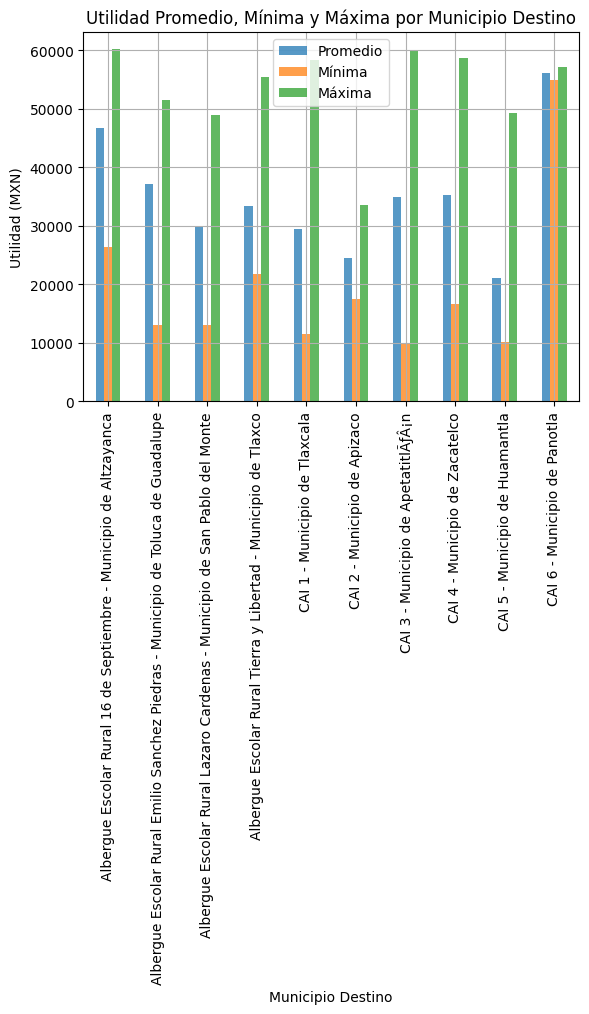

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_total_arroz_kg', 'utilidad_total_frijol_kg', 'utilidad_total_aceite_lt', 'utilidad_total_leche_lt',
    'utilidad_total_huevo_kg', 'utilidad_total_pasta_para_sopa_kg', 'utilidad_total_atun_en_agua_kg', 'utilidad_total_lenteja_kg',
    'utilidad_total_avena_en_hojuelas_kg', 'utilidad_total_garbanzo_kg', 'utilidad_total_haba_kg', 'utilidad_total_harina_de_amaranto_kg',
    'utilidad_total_jitomate_kg', 'utilidad_total_chayote_kg', 'utilidad_total_manzana_kg', 'utilidad_total_jicama_kg',
    'utilidad_total_pepino_kg', 'utilidad_total_cebolla_kg', 'utilidad_total_zanahoria_kg'
]

# Calcular la utilidad total para cada viaje
df['utilidad_total'] = df[productos].sum(axis=1)

# Calcular la utilidad promedio, mínima y máxima por municipio_destino
utilidad_por_municipio = df.groupby('municipio_de_destino')['utilidad_total'].agg(['mean', 'min', 'max'])

print("Utilidad promedio, mínima y máxima por municipio_destino:")
print(utilidad_por_municipio)

# Crear un gráfico de barras para visualizar la utilidad promedio, mínima y máxima por municipio
plt.figure(figsize=(14, 8))
utilidad_por_municipio.plot(kind='bar', y=['mean', 'min', 'max'], alpha=0.75)
plt.xlabel('Municipio Destino')
plt.ylabel('Utilidad (MXN)')
plt.title('Utilidad Promedio, Mínima y Máxima por Municipio Destino')
plt.legend(['Promedio', 'Mínima', 'Máxima'])
plt.grid(True)
plt.show()

Beneficio por kilómetro recorrido para cada viaje:
     distancia_recorrida_(km)  utilidad_total  beneficio_por_km
0                       94.50        16609.50        175.761905
1                       85.99        33499.17        389.570531
2                       54.44        23809.29        437.349192
3                       14.20        29878.52       2104.121127
4                       50.75        53695.49       1058.039212
..                        ...             ...               ...
177                     52.13        49223.44        944.244005
178                     20.75        22819.60       1099.739759
179                     32.21        13126.02        407.513816
180                     93.48        34808.54        372.363500
181                     38.63        55041.52       1424.838726

[182 rows x 3 columns]


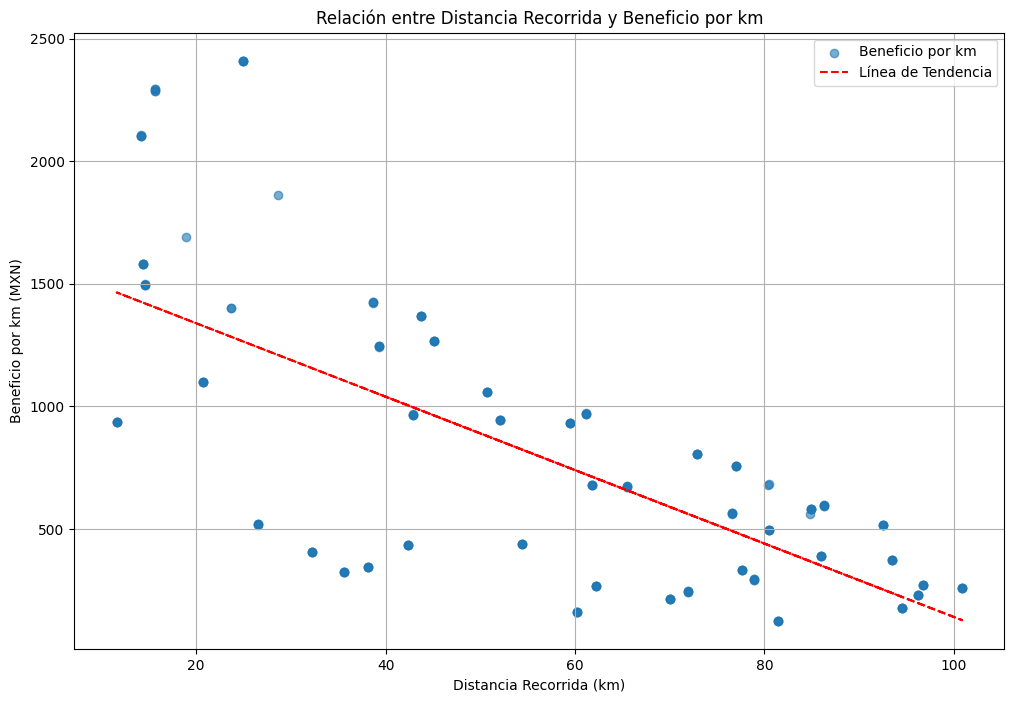

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_total_arroz_kg', 'utilidad_total_frijol_kg', 'utilidad_total_aceite_lt', 'utilidad_total_leche_lt',
    'utilidad_total_huevo_kg', 'utilidad_total_pasta_para_sopa_kg', 'utilidad_total_atun_en_agua_kg', 'utilidad_total_lenteja_kg',
    'utilidad_total_avena_en_hojuelas_kg', 'utilidad_total_garbanzo_kg', 'utilidad_total_haba_kg', 'utilidad_total_harina_de_amaranto_kg',
    'utilidad_total_jitomate_kg', 'utilidad_total_chayote_kg', 'utilidad_total_manzana_kg', 'utilidad_total_jicama_kg',
    'utilidad_total_pepino_kg', 'utilidad_total_cebolla_kg', 'utilidad_total_zanahoria_kg'
]

# Calcular la utilidad total para cada viaje
df['utilidad_total'] = df[productos].sum(axis=1)

# Calcular el beneficio por kilómetro recorrido
df['beneficio_por_km'] = df['utilidad_total'] / df['distancia_recorrida_(km)']

# Imprimir los resultados
print("Beneficio por kilómetro recorrido para cada viaje:")
print(df[['distancia_recorrida_(km)', 'utilidad_total', 'beneficio_por_km']])

# Crear un gráfico de dispersión para visualizar el beneficio por kilómetro recorrido en función de la distancia recorrida
plt.figure(figsize=(12, 8))
plt.scatter(df['distancia_recorrida_(km)'], df['beneficio_por_km'], alpha=0.6, label='Beneficio por km')

# Añadir una línea de tendencia
z = np.polyfit(df['distancia_recorrida_(km)'], df['beneficio_por_km'], 1)
p = np.poly1d(z)
plt.plot(df['distancia_recorrida_(km)'], p(df['distancia_recorrida_(km)']), "r--", label='Línea de Tendencia')

# Detalles del gráfico
plt.xlabel('Distancia Recorrida (km)')
plt.ylabel('Beneficio por km (MXN)')
plt.title('Relación entre Distancia Recorrida y Beneficio por km')
plt.grid(True)
plt.legend()
plt.show()

<ipython-input-103-2bd800bd0f98>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_largos['utilidad_total'] = viajes_largos[productos].sum(axis=1)
<ipython-input-103-2bd800bd0f98>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  viajes_largos['ganancia_supera_coste'] = viajes_largos['utilidad_total'] > viajes_largos['costo_mantenimiento_(mxn)']


Comparación de ganancias y costos de mantenimiento para viajes largos:
     distancia_recorrida_(km)  utilidad_total  costo_mantenimiento_(mxn)  \
0                       94.50        16609.50                     318.40   
1                       85.99        33499.17                     465.20   
2                       54.44        23809.29                     157.87   
4                       50.75        53695.49                      76.63   
6                       86.30        51429.94                     270.10   
..                        ...             ...                        ...   
173                     84.88        49217.82                     315.17   
174                     81.44        10217.97                     369.67   
175                     78.91        23140.41                     264.07   
177                     52.13        49223.44                     172.53   
180                     93.48        34808.54                     286.80   

     ganancia_su

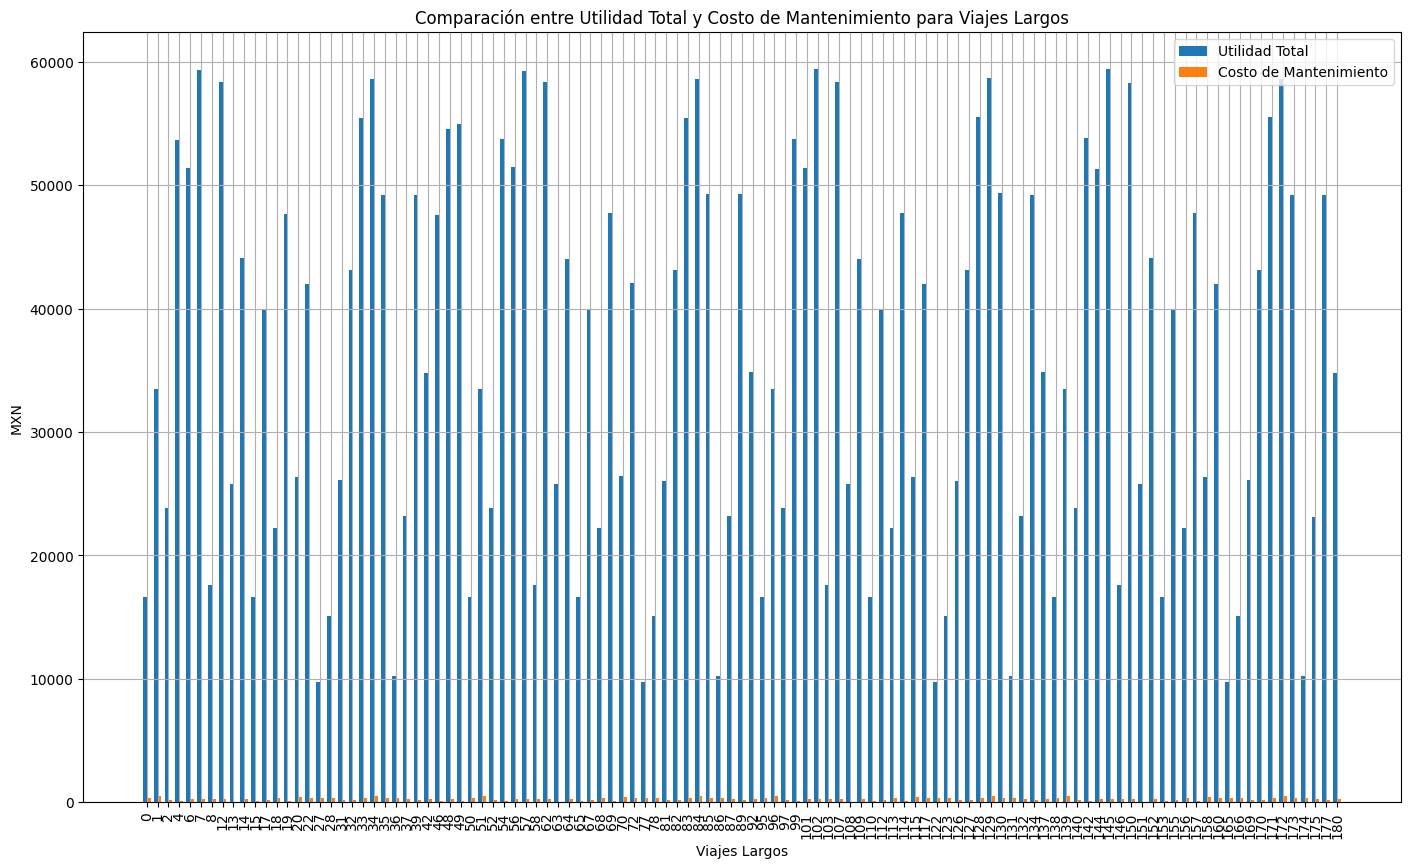

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_total_arroz_kg', 'utilidad_total_frijol_kg', 'utilidad_total_aceite_lt', 'utilidad_total_leche_lt',
    'utilidad_total_huevo_kg', 'utilidad_total_pasta_para_sopa_kg', 'utilidad_total_atun_en_agua_kg', 'utilidad_total_lenteja_kg',
    'utilidad_total_avena_en_hojuelas_kg', 'utilidad_total_garbanzo_kg', 'utilidad_total_haba_kg', 'utilidad_total_harina_de_amaranto_kg',
    'utilidad_total_jitomate_kg', 'utilidad_total_chayote_kg', 'utilidad_total_manzana_kg', 'utilidad_total_jicama_kg',
    'utilidad_total_pepino_kg', 'utilidad_total_cebolla_kg', 'utilidad_total_zanahoria_kg'
]

# Filtrar los viajes largos (por ejemplo, aquellos con una distancia recorrida mayor o igual a 50 km)
viajes_largos = df[df['distancia_recorrida_(km)'] >= 50]

# Calcular la utilidad total para cada viaje largo
viajes_largos['utilidad_total'] = viajes_largos[productos].sum(axis=1)

# Comparar la utilidad total con el costo de mantenimiento para cada viaje largo
viajes_largos['ganancia_supera_coste'] = viajes_largos['utilidad_total'] > viajes_largos['costo_mantenimiento_(mxn)']

# Imprimir los resultados
print("Comparación de ganancias y costos de mantenimiento para viajes largos:")
print(viajes_largos[['distancia_recorrida_(km)', 'utilidad_total', 'costo_mantenimiento_(mxn)', 'ganancia_supera_coste']])

# Crear un gráfico de barras para visualizar la comparación entre las ganancias y el costo de mantenimiento para los viajes largos
plt.figure(figsize=(17, 10))
bar_width = 0.35
index = np.arange(len(viajes_largos))

plt.bar(index, viajes_largos['utilidad_total'], bar_width, label='Utilidad Total')
plt.bar(index + bar_width, viajes_largos['costo_mantenimiento_(mxn)'], bar_width, label='Costo de Mantenimiento')

plt.xlabel('Viajes Largos')
plt.ylabel('MXN')
plt.title('Comparación entre Utilidad Total y Costo de Mantenimiento para Viajes Largos')
plt.xticks(index + bar_width / 2, viajes_largos.index, rotation=90)
plt.legend()
plt.grid(True)
plt.show()

Resultados de los viajes ordenados por distancia recorrida:
     distancia_recorrida_(km)  utilidad_total  costos_totales  beneficio_neto  \
75                      11.60        10855.58         1084.11         9771.47   
163                     11.60        10855.91         1084.11         9771.80   
25                      11.60        10874.99         1084.11         9790.88   
120                     11.60        10849.28         1084.11         9765.17   
53                      14.20        29861.35          957.42        28903.93   
..                        ...             ...             ...             ...   
115                     96.76        26343.15         1423.80        24919.35   
169                    100.88        26088.14         1307.84        24780.30   
126                    100.88        26033.49         1307.84        24725.65   
31                     100.88        26105.16         1307.84        24797.32   
81                     100.88        26054.12    

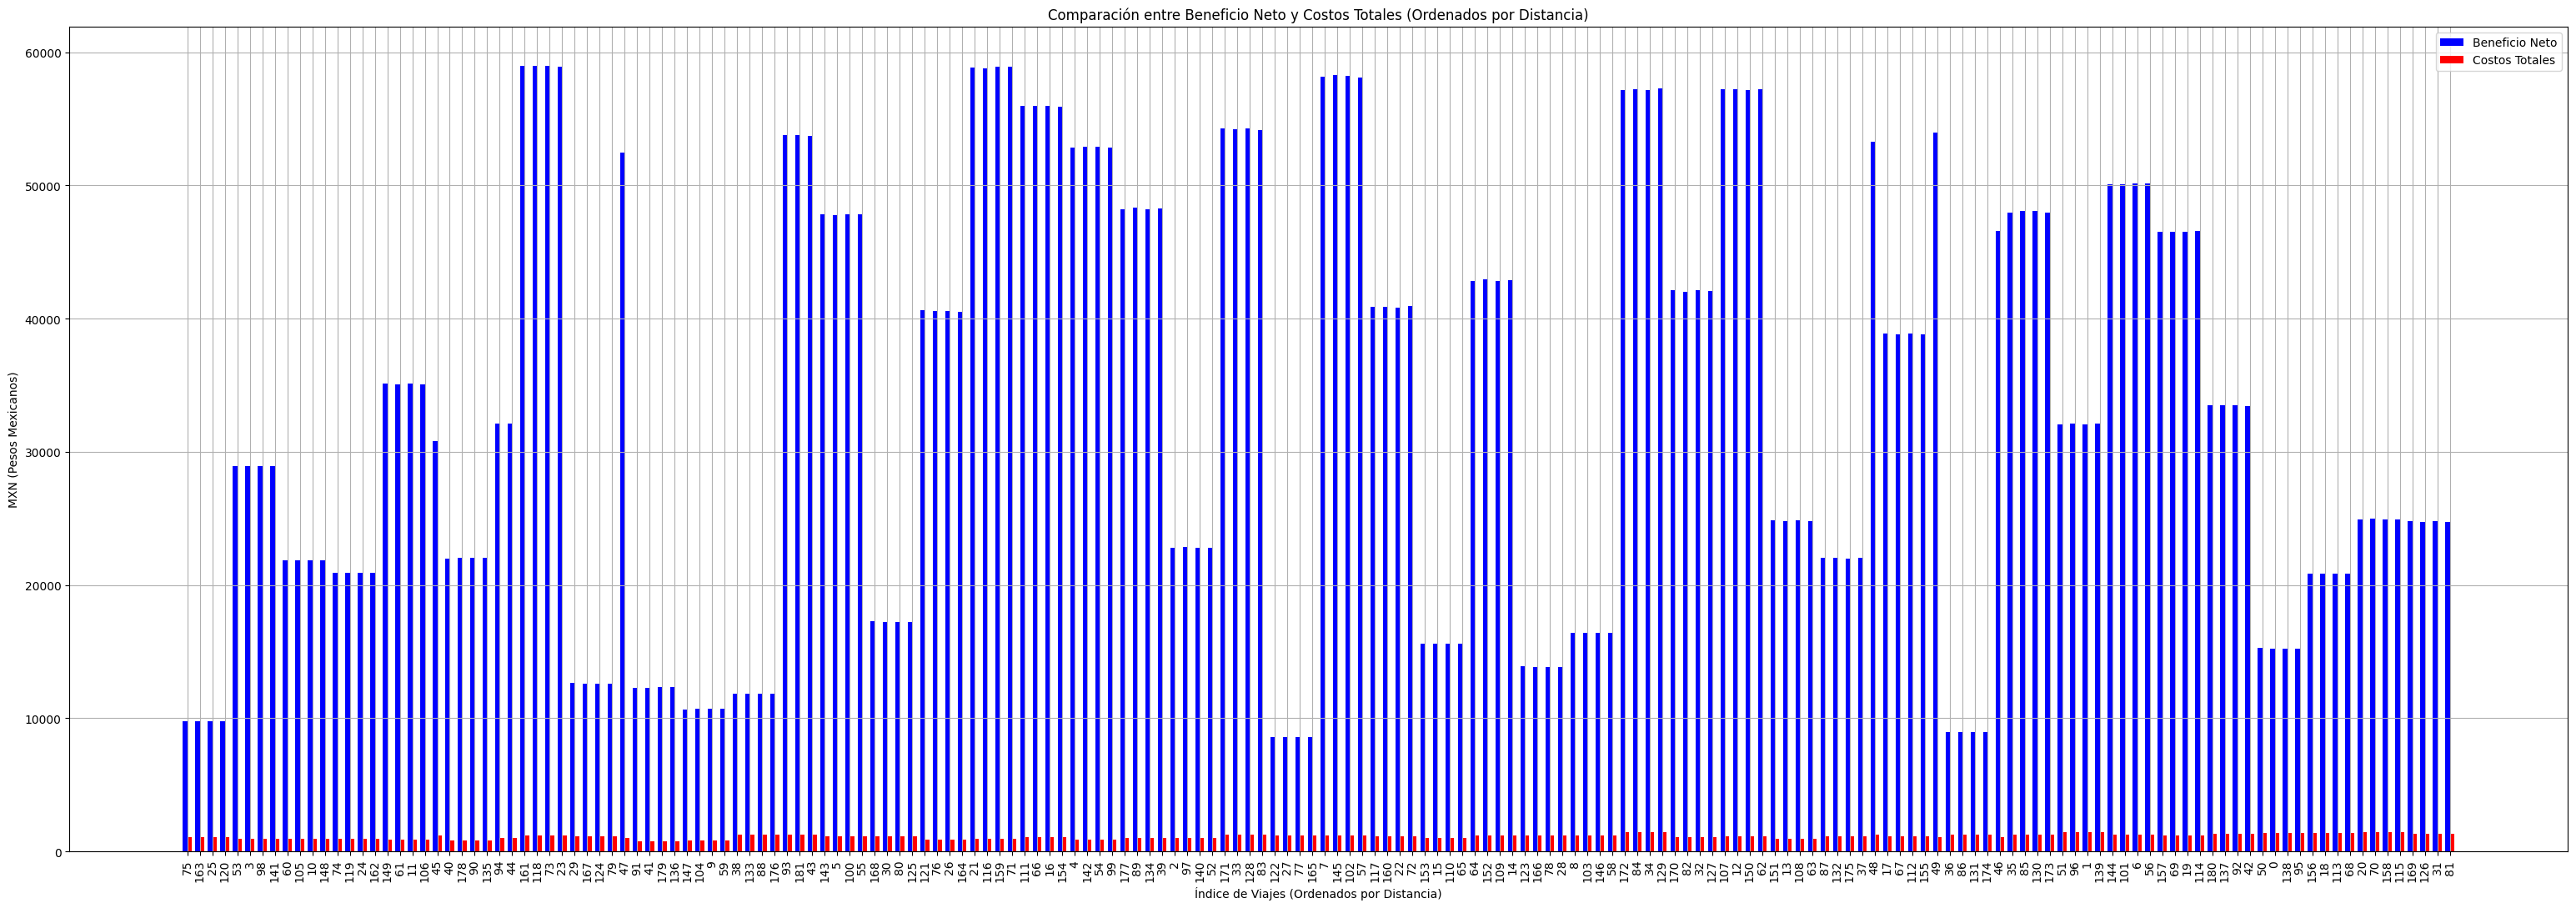

In [ ]:
# Lista de productos y sus utilidades
productos = [
    'utilidad_total_arroz_kg', 'utilidad_total_frijol_kg', 'utilidad_total_aceite_lt', 'utilidad_total_leche_lt',
    'utilidad_total_huevo_kg', 'utilidad_total_pasta_para_sopa_kg', 'utilidad_total_atun_en_agua_kg', 'utilidad_total_lenteja_kg',
    'utilidad_total_avena_en_hojuelas_kg', 'utilidad_total_garbanzo_kg', 'utilidad_total_haba_kg', 'utilidad_total_harina_de_amaranto_kg',
    'utilidad_total_jitomate_kg', 'utilidad_total_chayote_kg', 'utilidad_total_manzana_kg', 'utilidad_total_jicama_kg',
    'utilidad_total_pepino_kg', 'utilidad_total_cebolla_kg', 'utilidad_total_zanahoria_kg'
]

# Calcular la utilidad total para cada viaje
df['utilidad_total'] = df[productos].sum(axis=1)

# Calcular los costos totales sumando los costos de gasolina, conductor y mantenimiento
df['costos_totales'] = df['costo_gasolina_(mxn)'] + df['costo_conductor_(mxn)'] + df['costo_mantenimiento_(mxn)']

# Calcular el beneficio neto deduciendo los costos totales de la utilidad total
df['beneficio_neto'] = df['utilidad_total'] - df['costos_totales']

# Calcular el beneficio neto por kilómetro recorrido
df['beneficio_neto_por_km'] = df['beneficio_neto'] / df['distancia_recorrida_(km)']

# Ordenar el DataFrame por la distancia recorrida
df_sorted = df.sort_values(by='distancia_recorrida_(km)')

# Imprimir los resultados
print("Resultados de los viajes ordenados por distancia recorrida:")
print(df_sorted[['distancia_recorrida_(km)', 'utilidad_total', 'costos_totales', 'beneficio_neto', 'beneficio_neto_por_km']])

# Crear un gráfico de barras para visualizar el beneficio neto y los costos totales
plt.figure(figsize=(31, 11))
bar_width = 0.35
index = np.arange(len(df_sorted))

plt.bar(index, df_sorted['beneficio_neto'], bar_width, label='Beneficio Neto', color='blue')
plt.bar(index + bar_width, df_sorted['costos_totales'], bar_width, label='Costos Totales', color='red')

plt.xlabel('Índice de Viajes (Ordenados por Distancia)')
plt.ylabel('MXN (Pesos Mexicanos)')
plt.title('Comparación entre Beneficio Neto y Costos Totales (Ordenados por Distancia)')
plt.xticks(index + bar_width / 2, df_sorted.index, rotation=90)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

